<a href="https://colab.research.google.com/github/reyaput/Data/blob/main/problem_karirnex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

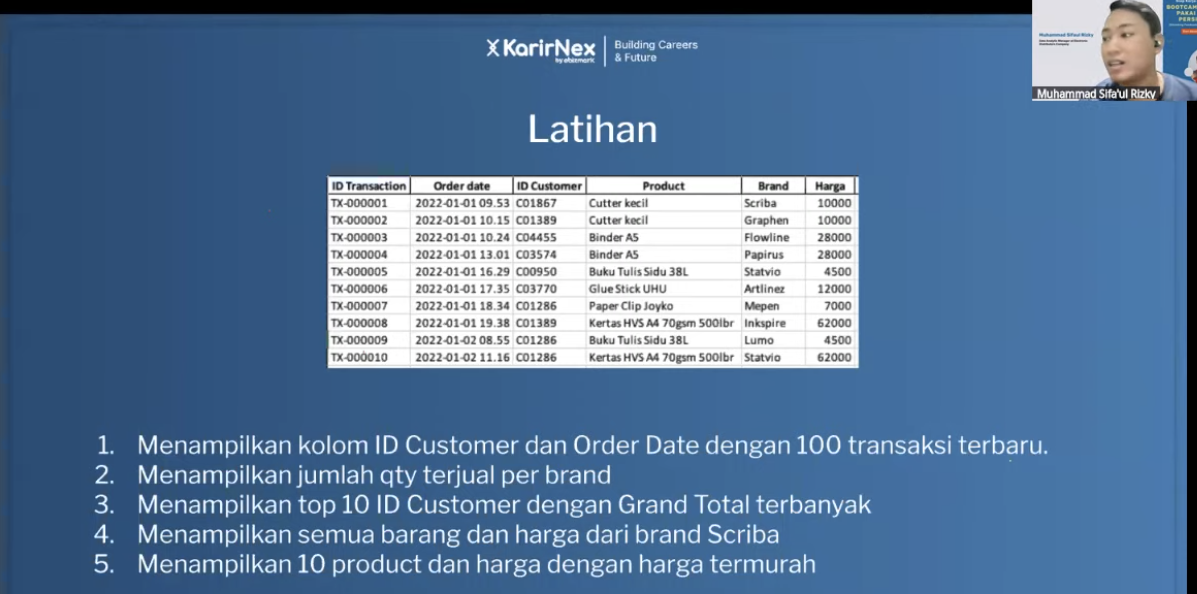

In [1]:
from google.colab import drive
!pip install ipython-sql sqlalchemy
%load_ext sql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.0 MB/s eta 0:00:00


In [47]:
file_id = "1ygVCPaIvpUekBF9hTcx4UA3vTkBCQlx5"
export_url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx"

data = pd.read_excel(export_url)

engine = create_engine('sqlite:///final.db')

data.to_sql('final', engine, if_exists='replace', index=False)

10000

In [48]:
%sql sqlite:///final.db

In [51]:
query = "SELECT * FROM Transactions LIMIT 5"
hasil = pd.read_sql(query, engine)

print(hasil)

  ID_Transaction                  Order_date ID_Customer              Product  \
0      TX-000001  2022-01-01 09:53:00.000000      C01867         Cutter kecil   
1      TX-000002  2022-01-01 10:15:00.000000      C01389         Cutter kecil   
2      TX-000003  2022-01-01 10:24:00.000000      C04455            Binder A5   
3      TX-000004  2022-01-01 13:01:00.000000      C03574            Binder A5   
4      TX-000005  2022-01-01 16:29:00.000000      C00950  Buku Tulis Sidu 38L   

      Brand  Harga  Kuantitas  Harga_Total  Total_Diskon  Total_Sales  \
0    Scriba  10000          3        30000             0        30000   
1   Graphen  10000          3        30000             0        30000   
2  Flowline  28000          5       140000             0       140000   
3   Papirus  28000          2        56000             0        56000   
4   Statvio   4500          2         9000             0         9000   

   Biaya_Ongkir  Grand_Total  
0         38453        68453  
1         32

**QUERY UNTUK MENGAKSES 100 TRANSAKSI TERBARU**


In [56]:
query = "SELECT ID_Customer, Order_date FROM Transactions ORDER BY Order_date DESC LIMIT 100"
hasil = pd.read_sql(query, engine)
print(hasil)

   ID_Customer                  Order_date
0       C02984  2025-06-03 20:02:00.000000
1       C00977  2025-06-03 18:19:00.000000
2       C00552  2025-06-03 17:49:00.000000
3       C00279  2025-06-03 17:40:00.000000
4       C02860  2025-06-03 16:55:00.000000
..         ...                         ...
95      C01286  2025-05-23 08:27:00.000000
96      C01389  2025-05-22 21:50:00.000000
97      C01063  2025-05-22 21:11:00.000000
98      C04142  2025-05-22 20:44:00.000000
99      C04284  2025-05-22 19:34:00.000000

[100 rows x 2 columns]


**QUERY UNTUK MENAMPILKAN JUMLAH BARANG TERJUAL**

In [61]:
query = "SELECT Brand, SUM(Kuantitas) AS Kuantitas_Terjual FROM Transactions GROUP BY Brand order bY Kuantitas_Terjual ASC "
hasil = pd.read_sql(query, engine)
print(hasil)

        Brand  Kuantitas_Terjual
0     Markify               1213
1      Scriba               1216
2        Lumo               1220
3    Pentagio               1223
4    DraftLab               1229
5     Inklite               1234
6   Papermark               1241
7     Officeo               1246
8     Statvio               1246
9    Inkspire               1247
10    Draftex               1248
11   Prograph               1249
12     Lumora               1250
13     Writex               1253
14     Notivo               1255
15    Papirus               1260
16   Flowline               1261
17     Quillo               1264
18    Graphen               1266
19   NexWrite               1266
20     Pensta               1277
21      Mepen               1283
22   Artlinez               1286
23     Vectro               1316


**QUERY UNTUK MENAMPILAK TOP 10 ID CUST DENGAN GRAND TOTAL TERBANYAK**

In [72]:
query = "SELECT id_customer, SUM(grand_total) AS Total FROM Transactions GROUP BY id_customer order by Total DESC LIMIT 10"
hasil = pd.read_sql(query, engine)
print(hasil)

  ID_Customer      Total
0      C01286  205321119
1      C01389  158808083
2      C00950   69301257
3      C03539   24038243
4      C01409   10248975
5      C02245    8655726
6      C04023    7275319
7      C02180     943653
8      C00478     943127
9      C01518     940863


**QUERY MENAMPILKAN SEMUA BARANG BRAND TERTENTU**

In [77]:
query = "SELECT Product, Brand, Harga from Transactions where brand='Scriba' group by product order by harga asc"
hasil = pd.read_sql(query, engine)
print(hasil)

                       Product   Brand   Harga
0                 Amplop Putih  Scriba    1200
1             Amplop Coklat F4  Scriba    2200
2              Penghapus kecil  Scriba    3000
3          Buku Tulis Sidu 38L  Scriba    4500
4               Penggaris 30cm  Scriba    5000
5                    Pensil 2B  Scriba    5000
6                       Map A4  Scriba    7000
7             Paper Clip Joyko  Scriba    7000
8                 Cutter kecil  Scriba   10000
9               Spidol Snowman  Scriba   11000
10              Glue Stick UHU  Scriba   12000
11            Pulpen Pilot 0.5  Scriba   12000
12         Stabilo Highlighter  Scriba   15000
13                   Binder A5  Scriba   28000
14  Kertas HVS A4 70gsm 500lbr  Scriba   62000
15            Kalkulator Casio  Scriba  175000


**QUERY MENAMPILKAN 10 PRODUCT DENGAN HARGA TERMURAH**

In [80]:
query = "SELECT product, harga FROM transactions group by product order by harga ASC limit 10"
hasil = pd.read_sql(query, engine)
print(hasil)

               Product  Harga
0         Amplop Putih   1200
1     Amplop Coklat F4   2200
2      Penghapus kecil   3000
3  Buku Tulis Sidu 38L   4500
4       Penggaris 30cm   5000
5            Pensil 2B   5000
6               Map A4   7000
7     Paper Clip Joyko   7000
8         Cutter kecil  10000
9       Spidol Snowman  11000


Total Penjualan dari Tahun ke Tahun:
   Sales_Year  Total_Sales_Amount
0        2022           182958179
1        2023           186191044
2        2024           193925710
3        2025            84265692


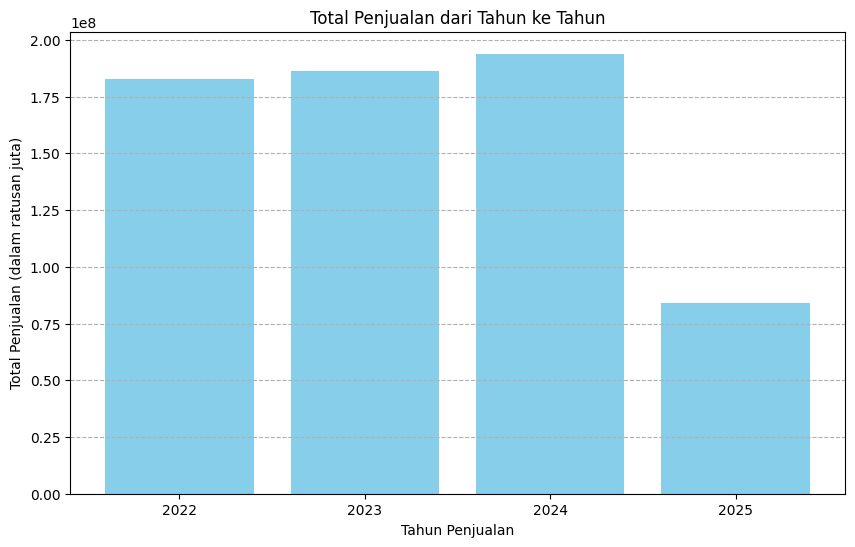

In [82]:
query_yearly_sales = """SELECT
    CAST(strftime('%Y', Order_date) AS INTEGER) AS Sales_Year,
    SUM(Total_Sales) AS Total_Sales_Amount
FROM
    final
GROUP BY
    Sales_Year
ORDER BY
    Sales_Year;"""

yearly_sales = pd.read_sql(query_yearly_sales, engine)

print("Total Penjualan dari Tahun ke Tahun:")
print(yearly_sales)

plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['Sales_Year'], yearly_sales['Total_Sales_Amount'], color='skyblue')
plt.xlabel('Tahun Penjualan')
plt.ylabel('Total Penjualan (dalam ratusan juta)')
plt.title('Total Penjualan dari Tahun ke Tahun')
plt.xticks(yearly_sales['Sales_Year'])
plt.grid(axis='y', linestyle='--')
plt.show()